# Testing visualizations.py

In [1]:
#!pip install mglearn
from visualizations import *
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

In [2]:
print_methods()

,method signature,task,output
0,"roc(y_test, y_pred)",binary class,plot
1,"auc(y_test, y_pred)",binary class,int
2,"auprc(y_test, y_pred)",binary class,int
3,"prob_density_curve(y_test, y_pred_proba)",binary class,plot
4,"prc(y_test, y_pred)",binary class,plot
5,"c_matrix(y_test, y_pred)",binary & multi class,plot
6,"prediction_samples(X_test, y_test, clf, feat_names)",binay & multi class,DataFrame
7,"prediction_plot(y_test, y_pred)",reg,plot
8,"residual_plot(y_test, y_pred)",reg,plot
9,"feat_importance(clf, feat_names=None)",linear & ensemble,plot


## Binary Classification

In [3]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)

y_pred_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

AUC:0.94


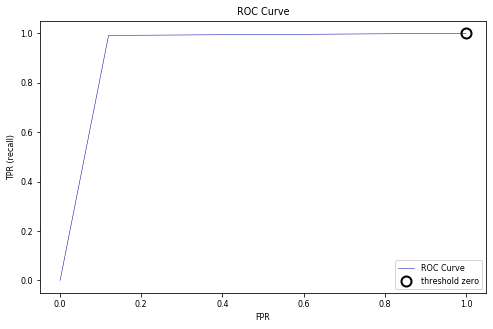

AUPRC:0.94


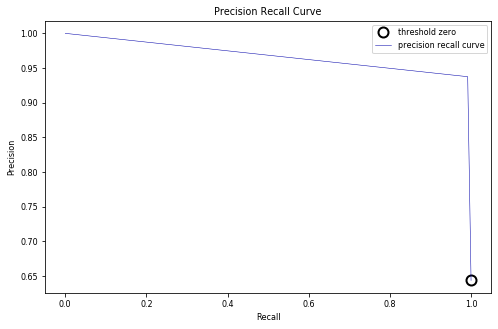

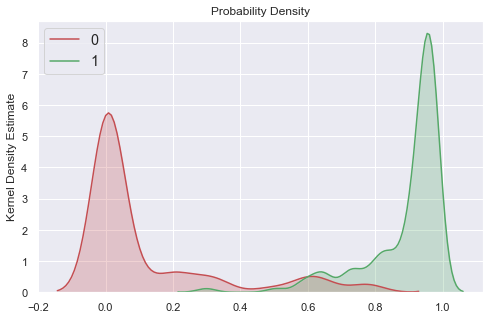

              precision    recall  f1-score   support

           0       0.98      0.88      0.93        67
           1       0.94      0.99      0.96       121

    accuracy                           0.95       188
   macro avg       0.96      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188



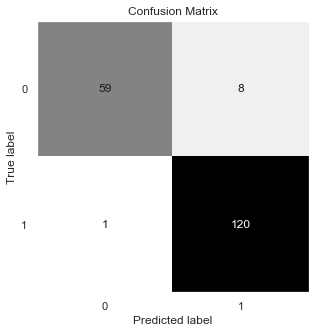

In [4]:
binary_classification(y_test, y_pred, y_pred_proba)

In [5]:
prediction_samples(X_test, y_test, clf, datasets.load_breast_cancer().feature_names.tolist())

,Label,Prediction,Negative Prob.,Positive Prob.,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.0,0.0,0.66,0.34,13.71,20.83,90.20,577.9,0.12,0.16,0.09,0.06,0.22,0.07,0.58,1.38,3.86,50.96,8.81e-03,0.03,0.02,1.45e-02,0.01,5.41e-03,17.06,28.14,110.6,897.0,0.17,0.37,0.27,0.16,0.32,0.12
1,0.0,0.0,0.67,0.33,15.22,30.62,103.40,716.9,0.10,0.21,0.26,0.09,0.21,0.07,0.26,1.21,2.36,22.65,4.62e-03,0.05,0.07,1.61e-02,0.02,6.14e-03,17.52,42.79,128.7,915.0,0.14,0.79,1.17,0.24,0.41,0.14
2,0.0,0.0,0.71,0.29,15.32,17.27,103.20,713.3,0.13,0.23,0.24,0.12,0.24,0.08,0.66,1.06,4.06,59.46,1.01e-02,0.05,0.05,2.13e-02,0.02,8.66e-03,17.73,22.66,119.8,928.8,0.18,0.45,0.44,0.22,0.33,0.12
3,1.0,1.0,0.41,0.59,14.74,25.42,94.70,668.6,0.08,0.07,0.04,0.03,0.18,0.06,0.30,1.39,2.18,27.41,4.77e-03,0.01,0.02,1.27e-02,0.02,2.63e-03,16.51,32.29,107.4,826.4,0.11,0.14,0.16,0.11,0.27,0.07
4,1.0,1.0,0.42,0.58,14.64,16.85,94.21,666.0,0.09,0.07,0.05,0.03,0.14,0.05,0.22,1.01,1.47,19.98,3.53e-03,0.01,0.02,6.14e-03,0.01,1.22e-03,16.46,25.44,106.0,831.0,0.11,0.21,0.24,0.08,0.25,0.07
5,1.0,1.0,0.49,0.51,15.04,16.74,98.73,689.4,0.10,0.14,0.08,0.06,0.17,0.07,0.37,0.84,2.30,34.84,4.12e-03,0.02,0.02,1.00e-02,0.01,3.24e-03,16.76,20.43,109.7,856.9,0.11,0.22,0.19,0.10,0.22,0.09
6,0.0,1.0,0.51,0.49,13.40,20.52,88.64,556.7,0.11,0.15,0.14,0.08,0.21,0.07,0.39,0.93,3.09,33.67,5.41e-03,0.02,0.03,1.33e-02,0.02,4.00e-03,16.41,29.66,113.3,844.4,0.16,0.39,0.51,0.21,0.36,0.11
7,0.0,1.0,0.43,0.57,13.96,17.05,91.43,602.4,0.11,0.13,0.10,0.05,0.19,0.06,0.42,0.81,2.56,35.74,6.35e-03,0.03,0.03,1.34e-02,0.02,2.69e-03,16.39,22.07,108.1,826.0,0.15,0.33,0.32,0.14,0.31,0.08
8,0.0,1.0,0.40,0.60,13.80,15.79,90.43,584.1,0.10,0.13,0.08,0.05,0.17,0.07,0.28,0.62,1.96,23.35,4.72e-03,0.02,0.02,9.21e-03,0.01,3.13e-03,16.57,20.86,110.3,812.4,0.14,0.35,0.28,0.14,0.26,0.10


## Multiclass Classification

In [6]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)

y_pred_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.65      0.62      0.64        24
           2       0.44      0.47      0.45        15

    accuracy                           0.71        59
   macro avg       0.70      0.70      0.70        59
weighted avg       0.72      0.71      0.71        59



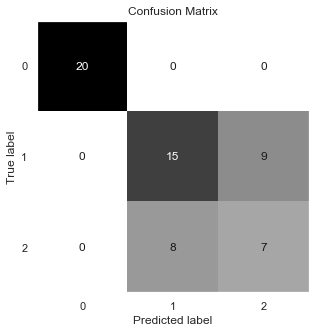

In [8]:
multiclass_classification(y_test, y_pred, y_pred_proba)

In [7]:
prediction_samples(X_test, y_test, clf, datasets.load_wine().feature_names)

,Label,Prediction,0 Prob.,1 Prob.,2 Prob.,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.0,0.0,0.56,0.21,0.23,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0
1,0.0,0.0,0.46,0.26,0.28,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0
2,0.0,0.0,0.46,0.26,0.28,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0
3,1.0,1.0,0.01,0.61,0.38,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365.0
4,1.0,1.0,0.01,0.60,0.39,13.03,0.90,1.71,16.0,86.0,1.95,2.03,0.24,1.46,4.60,1.19,2.48,392.0
5,1.0,1.0,0.02,0.58,0.40,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0
6,1.0,2.0,0.22,0.41,0.38,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0
7,1.0,2.0,0.22,0.41,0.38,13.34,0.94,2.36,17.0,110.0,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750.0
8,1.0,2.0,0.15,0.46,0.39,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0
9,2.0,2.0,0.09,0.50,0.41,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0


## Regression

In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = datasets.load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

regr = make_pipeline(StandardScaler(),
                     LinearSVR(random_state=0, tol=1e-5))
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

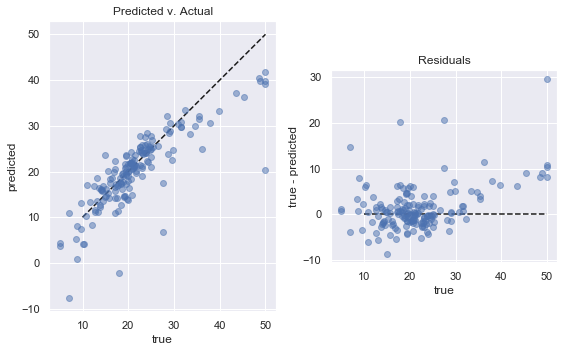

In [11]:
regression(y_test, y_pred)

Feature: CRIM, Score: -1.12229
Feature: ZN, Score: 0.82890
Feature: INDUS, Score: 0.24032
Feature: CHAS, Score: 0.46869
Feature: NOX, Score: -0.68835
Feature: RM, Score: 3.94299
Feature: AGE, Score: -1.21676
Feature: DIS, Score: -2.26185
Feature: RAD, Score: 0.40595
Feature: TAX, Score: -0.77053
Feature: PTRATIO, Score: -1.38574
Feature: B, Score: 0.96825
Feature: LSTAT, Score: -2.48837


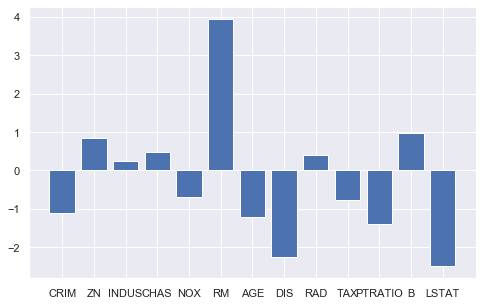

In [12]:
feat_importance(regr['linearsvr'], datasets.load_boston().feature_names)

# Feature Importance

In [13]:
from sklearn.datasets import make_classification
X_c, y_c = make_classification(n_samples=1000, n_features=3, n_informative=2, n_redundant=1, random_state=1)
print(X_c.shape, y_c.shape)

from sklearn.datasets import make_regression
X_r, y_r = make_regression(n_samples=1000, n_features=3, n_informative=2, random_state=1)
print(X_r.shape, y_r.shape)

feat_names = ['feat_1','feat_2','feat_3']

(1000, 3) (1000,)
(1000, 3) (1000,)


## Linear Models

Feature: feat_1, Score: 0.00000
Feature: feat_2, Score: 88.87000
Feature: feat_3, Score: 86.56245


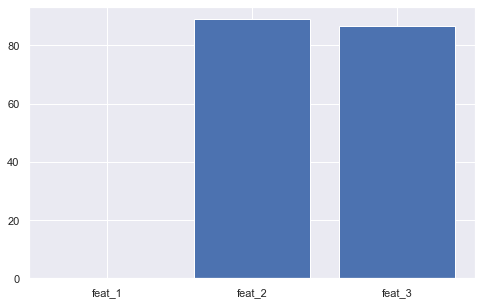

In [14]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

model = LinearRegression()
model.fit(X_r, y_r)

feat_importance(model, feat_names)

## Ensemble Models

Feature: feat_1, Score: 0.00268
Feature: feat_2, Score: 0.50001
Feature: feat_3, Score: 0.49731


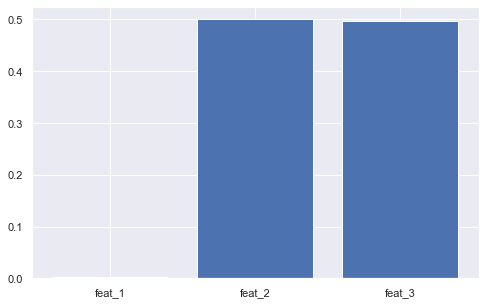

In [15]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_r, y_r)
feat_importance(model, feat_names)